Wpierw załączmy paczki i wczytajmy dane

In [6]:

import pandas as pd
import numpy as np

from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import matplotlib.image as mpimg


In [3]:
df = pd.DataFrame(pd.read_json("https://api.apispreadsheets.com/api/dataset/congressional-voting/",
                    orient = 'split'))

Sprawdźmy następnie jakie kolumny ma zbió© danych

In [11]:
df.columns

Index(['handicapped_infants', 'water_project_cost_sharing',
       'adoption_of_the_budget_resolution', 'physician_fee_freeze',
       'el_salvador_aid', 'religious_groups_in_schools',
       'anti_satellite_test_ban', 'aid_to_nicaraguan_contras', 'mx_missile',
       'immigration', 'synfuels_corporation_cutback', 'education_spending',
       'superfund_right_to_sue', 'crime', 'duty_free_exports',
       'export_administration_act_south_africa', 'political_party'],
      dtype='object')

i przystąpmy do zautomatyzowanej eksploracji

In [5]:
from pandas_profiling import ProfileReport

In [7]:
profile = ProfileReport( df, title="Pandas Profiling Report")

In [8]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/30 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Wpierw zauważmy, ze bywają głosowania, w których głosy są idealnie podzielone 50/50 wewnątrz poszczególnych partii

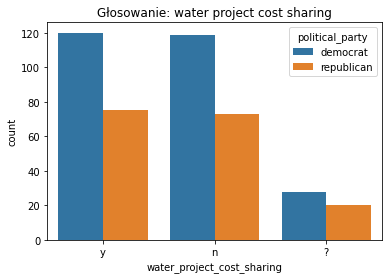

In [9]:

fig = plt.figure()
sns.countplot( data = df, x="water_project_cost_sharing", hue="political_party",
              hue_order=["democrat","republican"],
              order=["y","n","?"])

plt.title("Głosowanie: water project cost sharing")


fig.savefig('water_sharing.png')

plt.show()

Następnie zauważmy, ze wiele głosowań miało charakter taki, że prawie wszyscy republikanie byli na tak, a demokraci, w większości, na nie

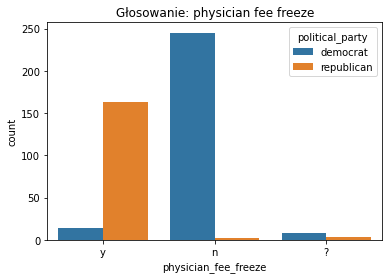

In [10]:
fig = plt.figure()

sns.countplot( data = df, x="physician_fee_freeze", hue="political_party",
              hue_order=["democrat","republican"],
              order=["y","n","?"])
plt.title("Głosowanie: physician fee freeze")
fig.savefig('physician_fee_freeze.png')
plt.show()

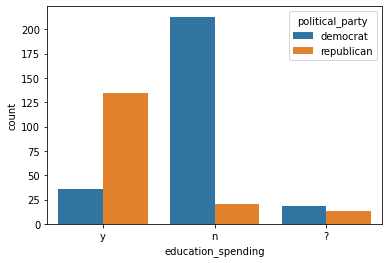

In [54]:
sns.countplot( data = df, x="education_spending", hue="political_party",
              hue_order=["democrat","republican"],
              order=["y","n","?"])
plt.show()

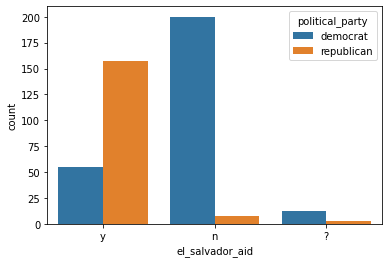

In [44]:
sns.countplot( data = df, x="el_salvador_aid", hue="political_party",
              hue_order=["democrat","republican"],
              order=["y","n","?"])
plt.show()

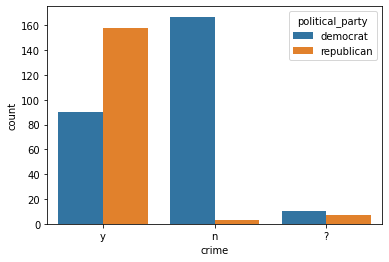

In [45]:
sns.countplot( data = df, x="crime", hue="political_party",
              hue_order=["democrat","republican"],
              order=["y","n","?"])
plt.show()

I przejdźmy do zbadania rozkładu (histogramowego) łącznego 3 z badanych głosowań

<Figure size 432x288 with 0 Axes>

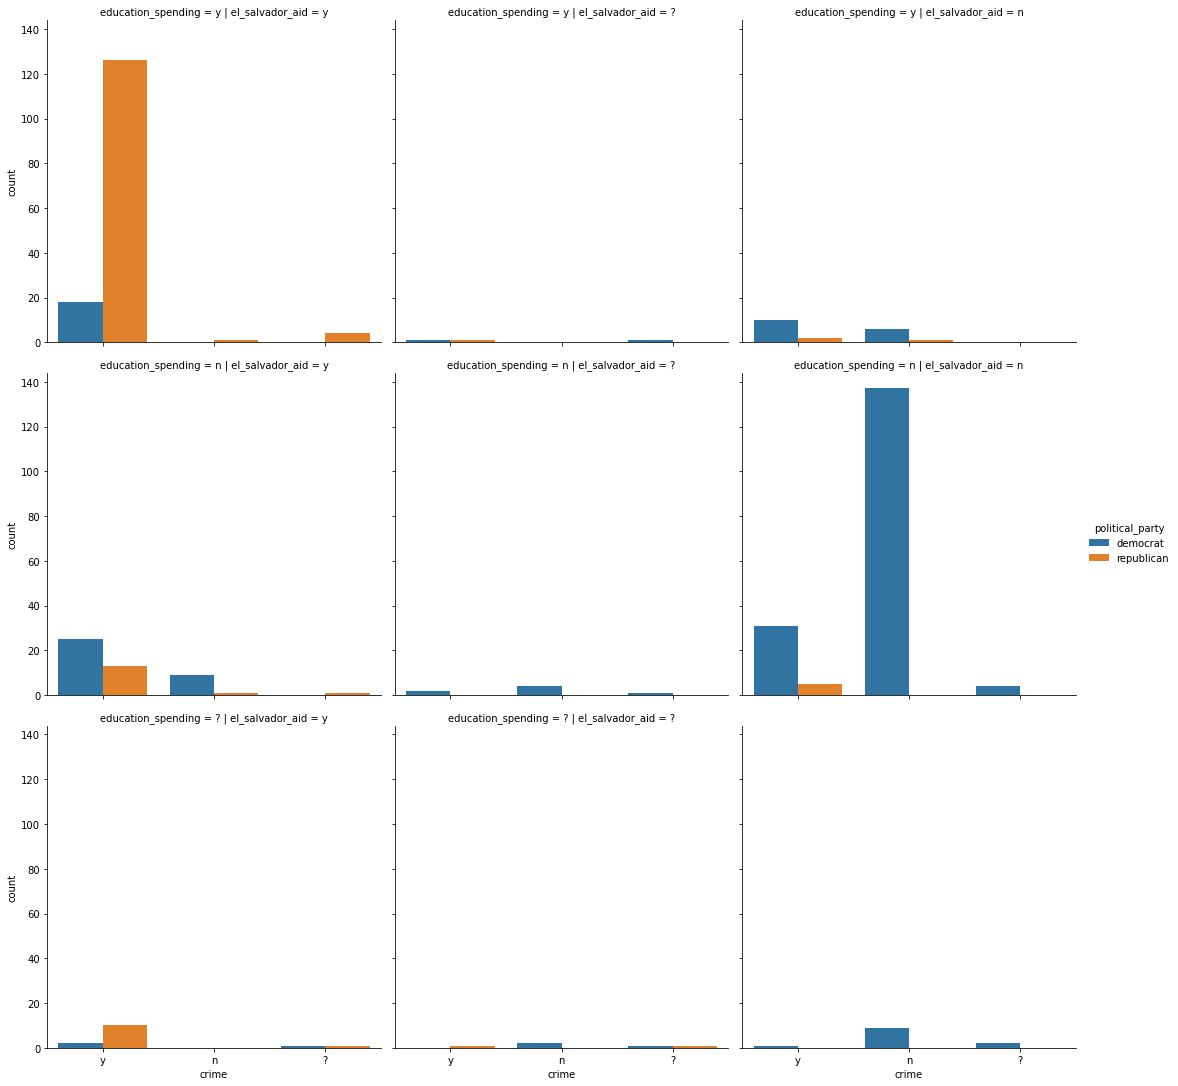

In [13]:
fig = plt.figure()

sns.catplot( data = df, x="crime", hue="political_party",
            col="el_salvador_aid", row = "education_spending",
              hue_order=["democrat","republican"], kind="count",
              order=["y","n","?"])
plt.title("")
fig.savefig('dobre_odseparowanie.png')
plt.show()

Pozwalają one zauważyć mocne odseparowanie partii na podstawie głosowań.

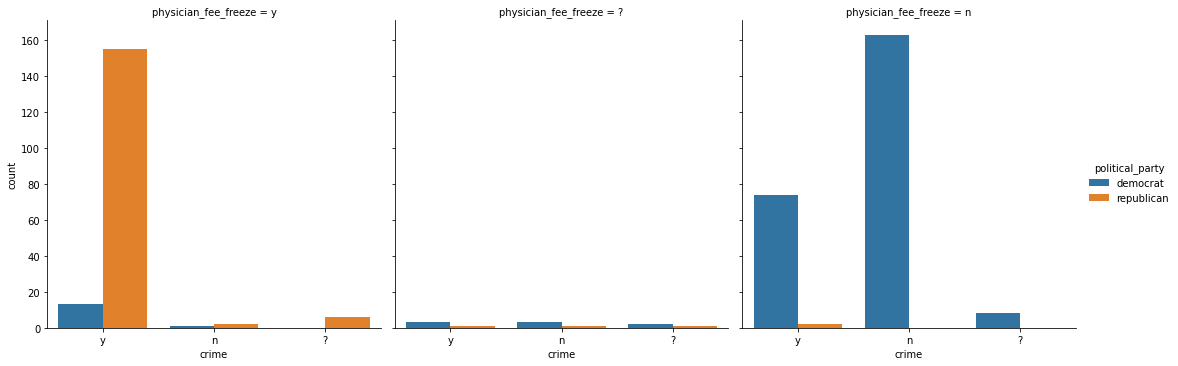

In [62]:
 sns.catplot( data = df, x="crime", hue="political_party", col="physician_fee_freeze",
              hue_order=["democrat","republican"], kind="count",
              order=["y","n","?"])
plt.show()


Następnie, zwróćmy uwagę na zestaw głosowań, w których to demokraci w większości głosowali na tak, a republikanie na nie. Tutaj odseparowanie partii nie jest aż tak silne

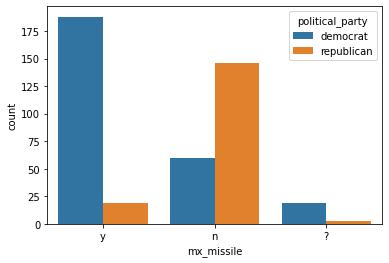

In [46]:
sns.countplot( data = df, x="mx_missile", hue="political_party",
              hue_order=["democrat","republican"],
              order=["y","n","?"])
plt.show()

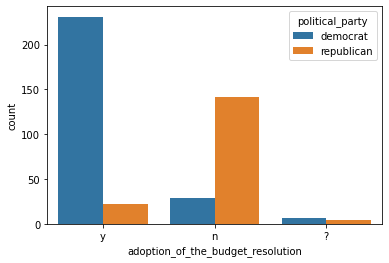

In [47]:
sns.countplot( data = df, x="adoption_of_the_budget_resolution", hue="political_party",
              hue_order=["democrat","republican"],
              order=["y","n","?"])
plt.show()

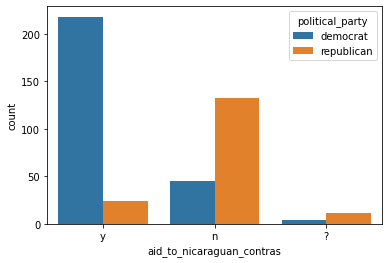

In [49]:
sns.countplot( data = df, x="aid_to_nicaraguan_contras", hue="political_party",
              hue_order=["democrat","republican"],
              order=["y","n","?"])
plt.show()

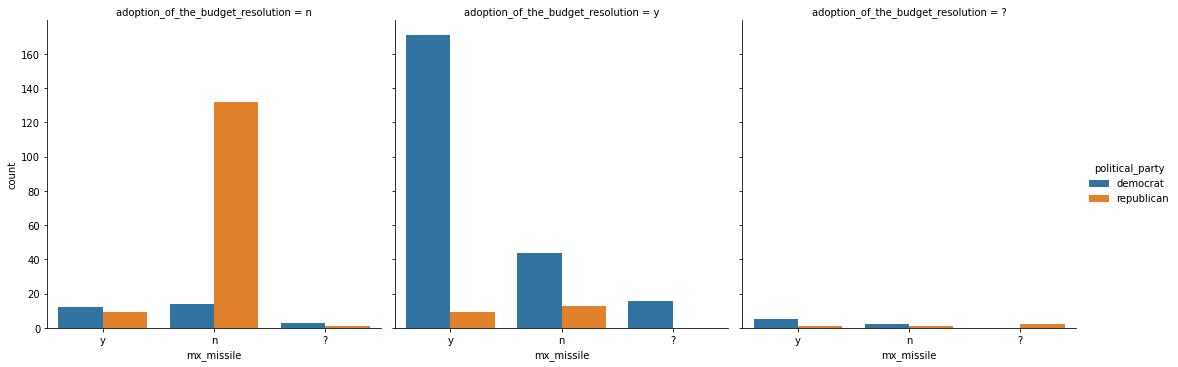

In [60]:
sns.catplot( data = df, x="mx_missile", hue="political_party", col="adoption_of_the_budget_resolution",
              hue_order=["democrat","republican"], kind="count",
              order=["y","n","?"])
plt.show()

choć odseparowanie partii nie było aż tak silne w rozważanych głosowaniach, zbadanie rozkładu łącznego ułatwia rozdzielenie partii.

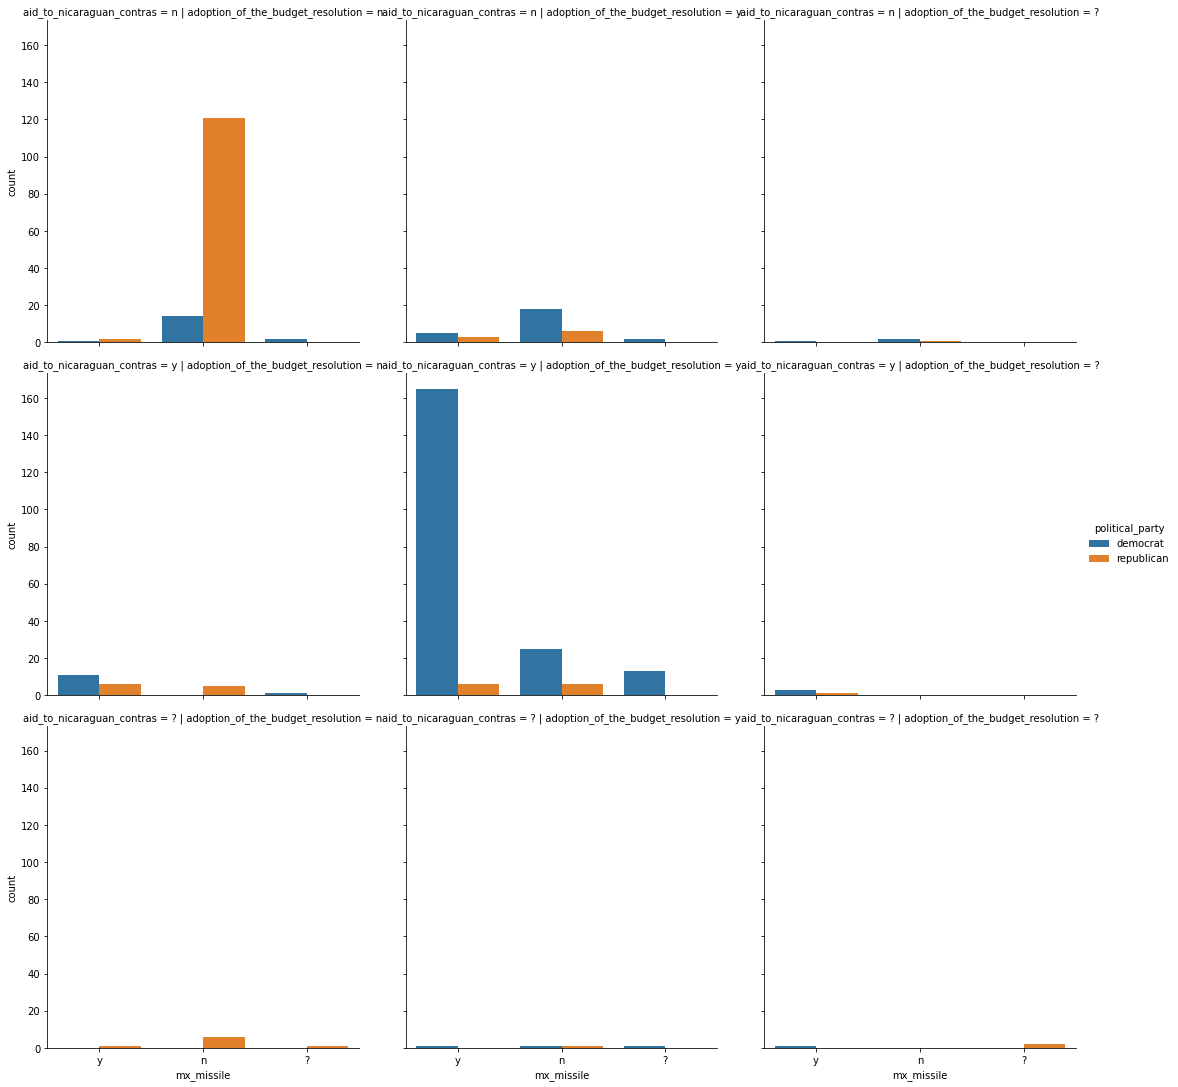

In [65]:
sns.catplot( data = df, x="mx_missile", hue="political_party",
            col="adoption_of_the_budget_resolution", row = "aid_to_nicaraguan_contras",
              hue_order=["democrat","republican"], kind="count",
              order=["y","n","?"])
plt.show()

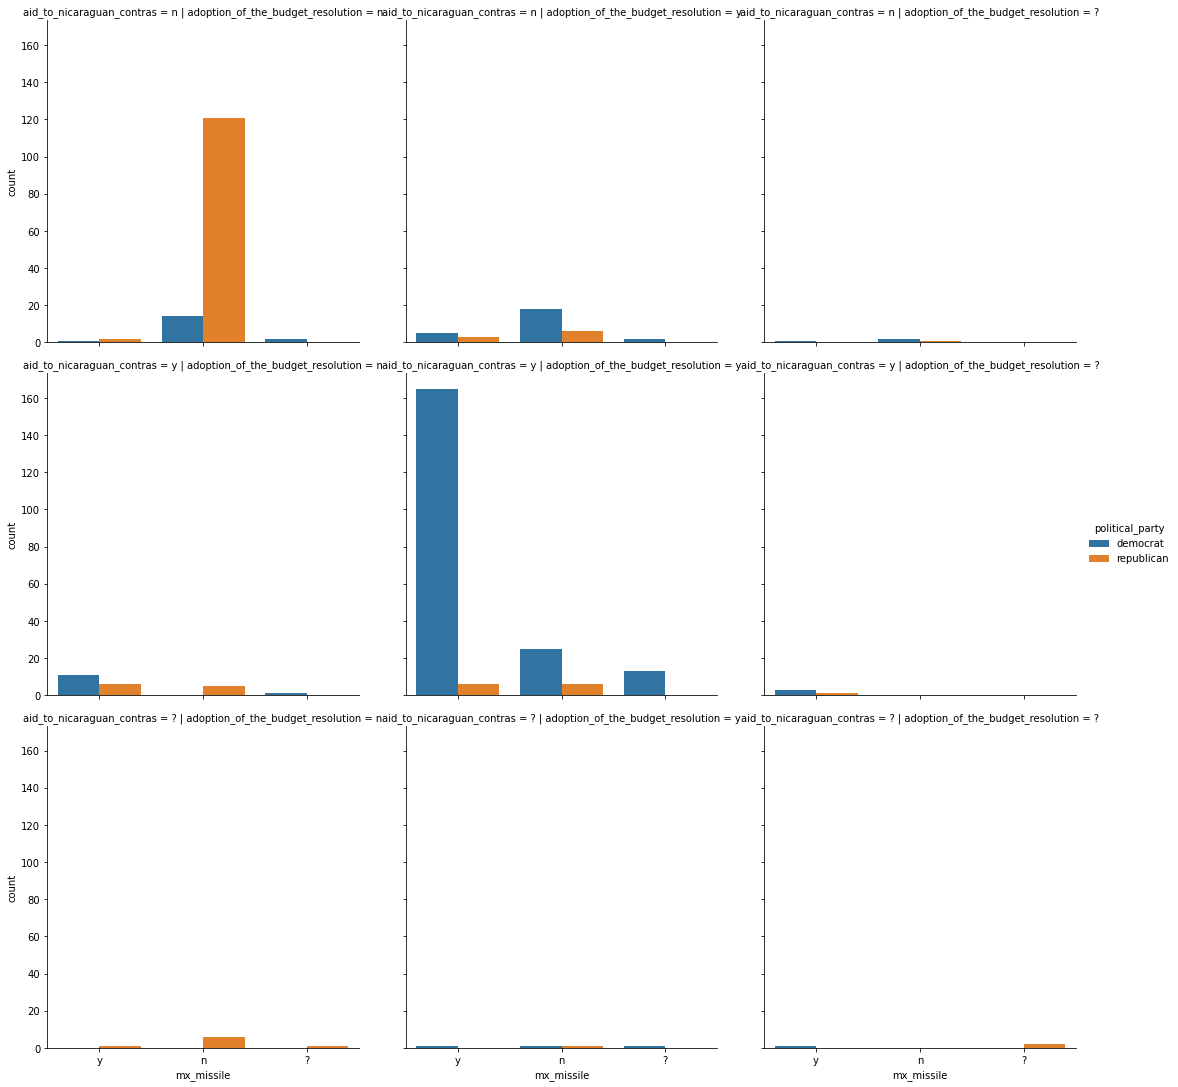

In [6]:
sns.catplot( data = df, x="mx_missile", hue="political_party",
            col="adoption_of_the_budget_resolution", row = "aid_to_nicaraguan_contras",
              hue_order=["democrat","republican"], kind="count",
              order=["y","n","?"])
plt.show()

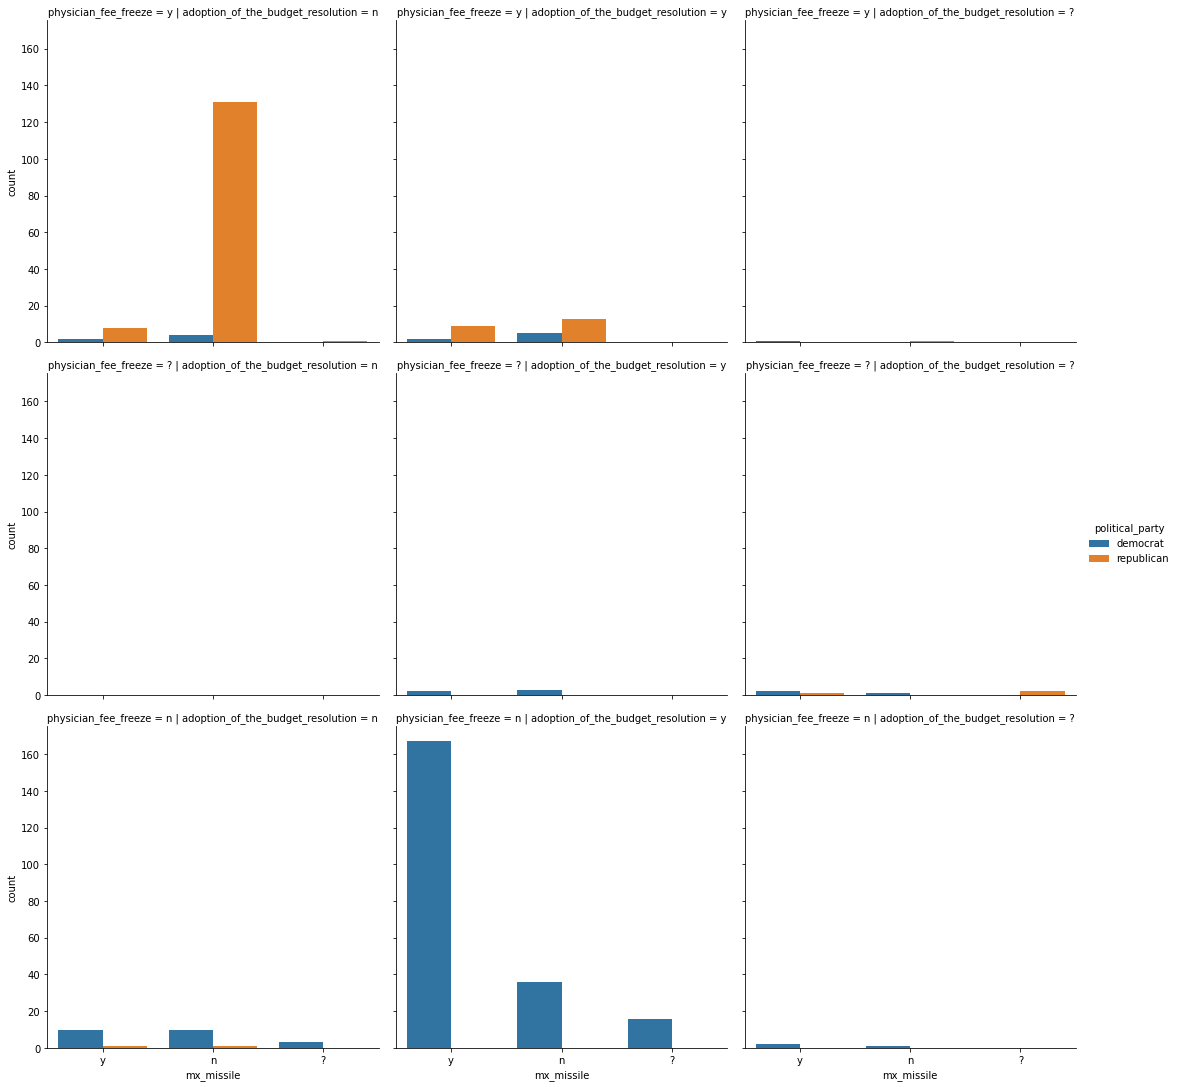

In [3]:
sns.catplot( data = df, x="mx_missile", hue="political_party",
            col="adoption_of_the_budget_resolution", row = "physician_fee_freeze",
              hue_order=["democrat","republican"], kind="count",
              order=["y","n","?"])
plt.show()

Ostatecznie spójrzmy na zestawy danych, które najmniej rozdzielają partie

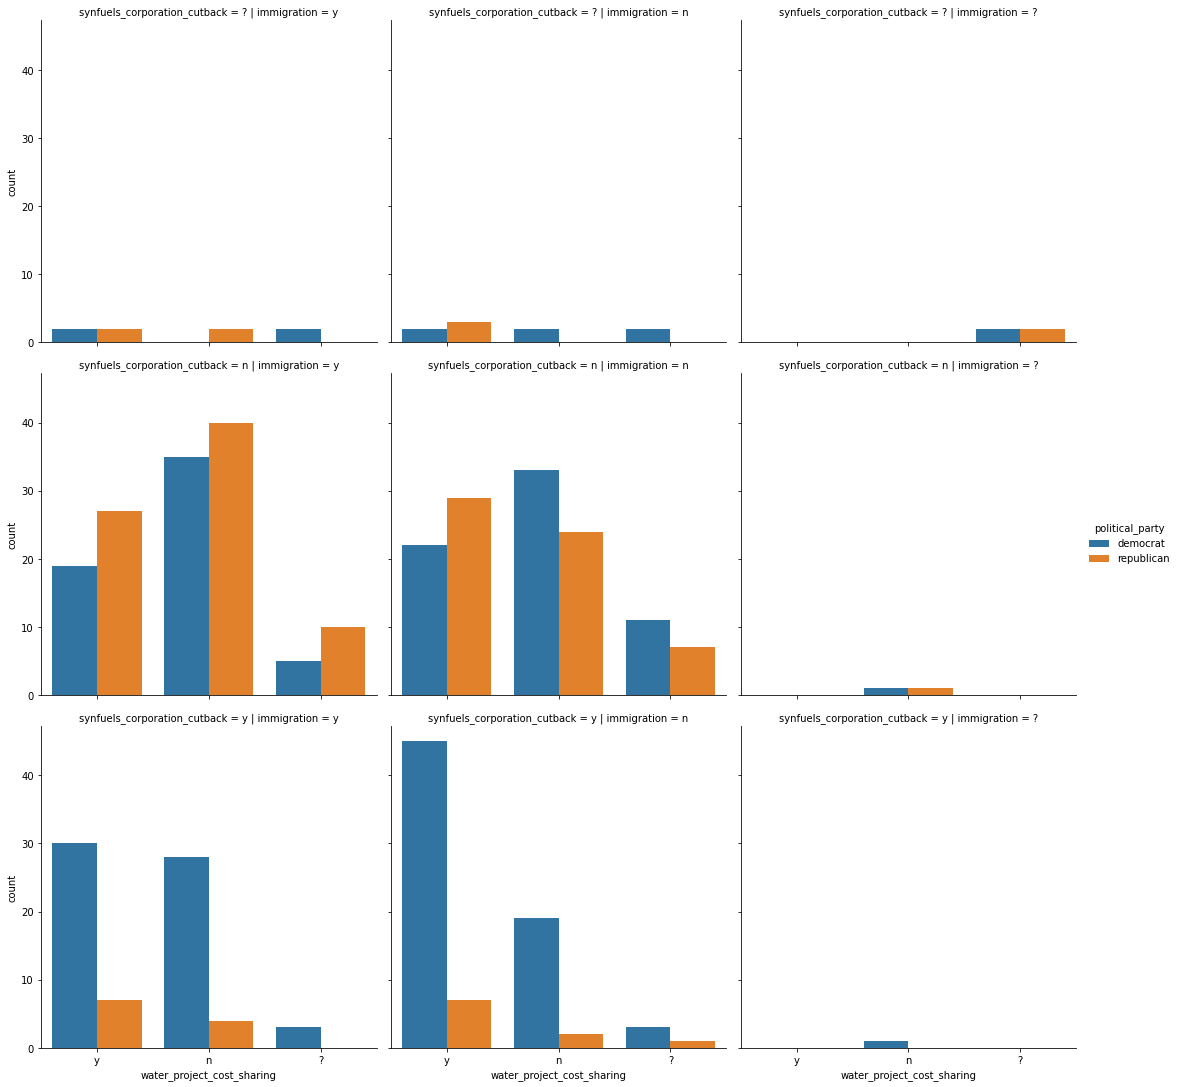

In [14]:
sns.catplot( data = df, x="water_project_cost_sharing", hue="political_party",
            col="immigration", row = "synfuels_corporation_cutback",
              hue_order=["democrat","republican"], kind="count",
              order=["y","n","?"])
plt.show()